### Importing the required libraries & Dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
black_friday_sales_data_path=r'C:\Users\DELL\Desktop\MLStudy\Kaggle_Competitions\black_friday_data.csv'

In [3]:
df=pd.read_csv(black_friday_sales_data_path)

### Basic Metadata Analysis

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.shape

(550068, 12)

In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


### EDA
### Univariate Analysis

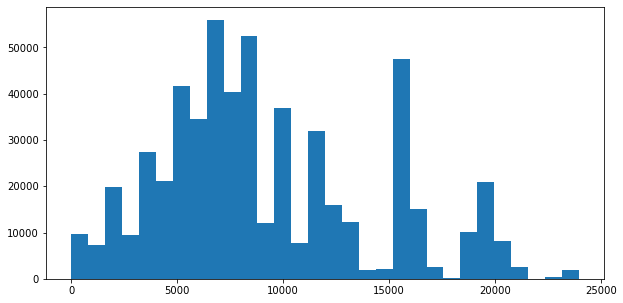

In [10]:
plt.figure(figsize=(10,5))
plt.hist(df.Purchase,bins=30)
plt.show()

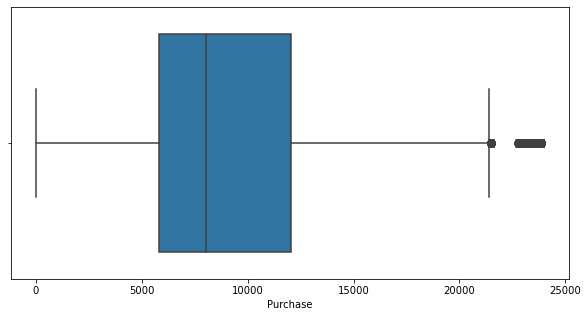

In [11]:
# Boxplot for checking the outliers effectively
plt.figure(figsize=(10,5))
sns.boxplot(x=df.Purchase)
plt.show()

In [12]:
# Identify columns with 25 or fewer unique values for countplots
countplot_columns=[]
for each_col in df.columns:
  if df[each_col].nunique()<=25:
    countplot_columns.append(each_col)

In [13]:
# Finding out the outliers which might need to be dropped as they might drop the accuracy of the model 
for each_entry in range(20000,max(df.Purchase),500):
  print(f'The purchases more than {each_entry} are {len(df[df.Purchase>=each_entry])} & the percentage of these purchases to total purchases is {100*round(len(df[df.Purchase>=each_entry])/df.shape[0],3)}% ')

# Based upon observations it seems that I need to drop purchases above 21500 as they are very low as a percentage of total purchases
# However these purchases might present certain characteristics of high capacity buyers so I decided not to drop them
######### In future I plan to impelement an clustering algorithm based upon the characteristics of the customers #########

The purchases more than 20000 are 12697 & the percentage of these purchases to total purchases is 2.3% 
The purchases more than 20500 are 7445 & the percentage of these purchases to total purchases is 1.4000000000000001% 
The purchases more than 21000 are 3546 & the percentage of these purchases to total purchases is 0.6% 
The purchases more than 21500 are 2506 & the percentage of these purchases to total purchases is 0.5% 
The purchases more than 22000 are 2350 & the percentage of these purchases to total purchases is 0.4% 
The purchases more than 22500 are 2350 & the percentage of these purchases to total purchases is 0.4% 
The purchases more than 23000 are 2315 & the percentage of these purchases to total purchases is 0.4% 
The purchases more than 23500 are 1123 & the percentage of these purchases to total purchases is 0.2% 


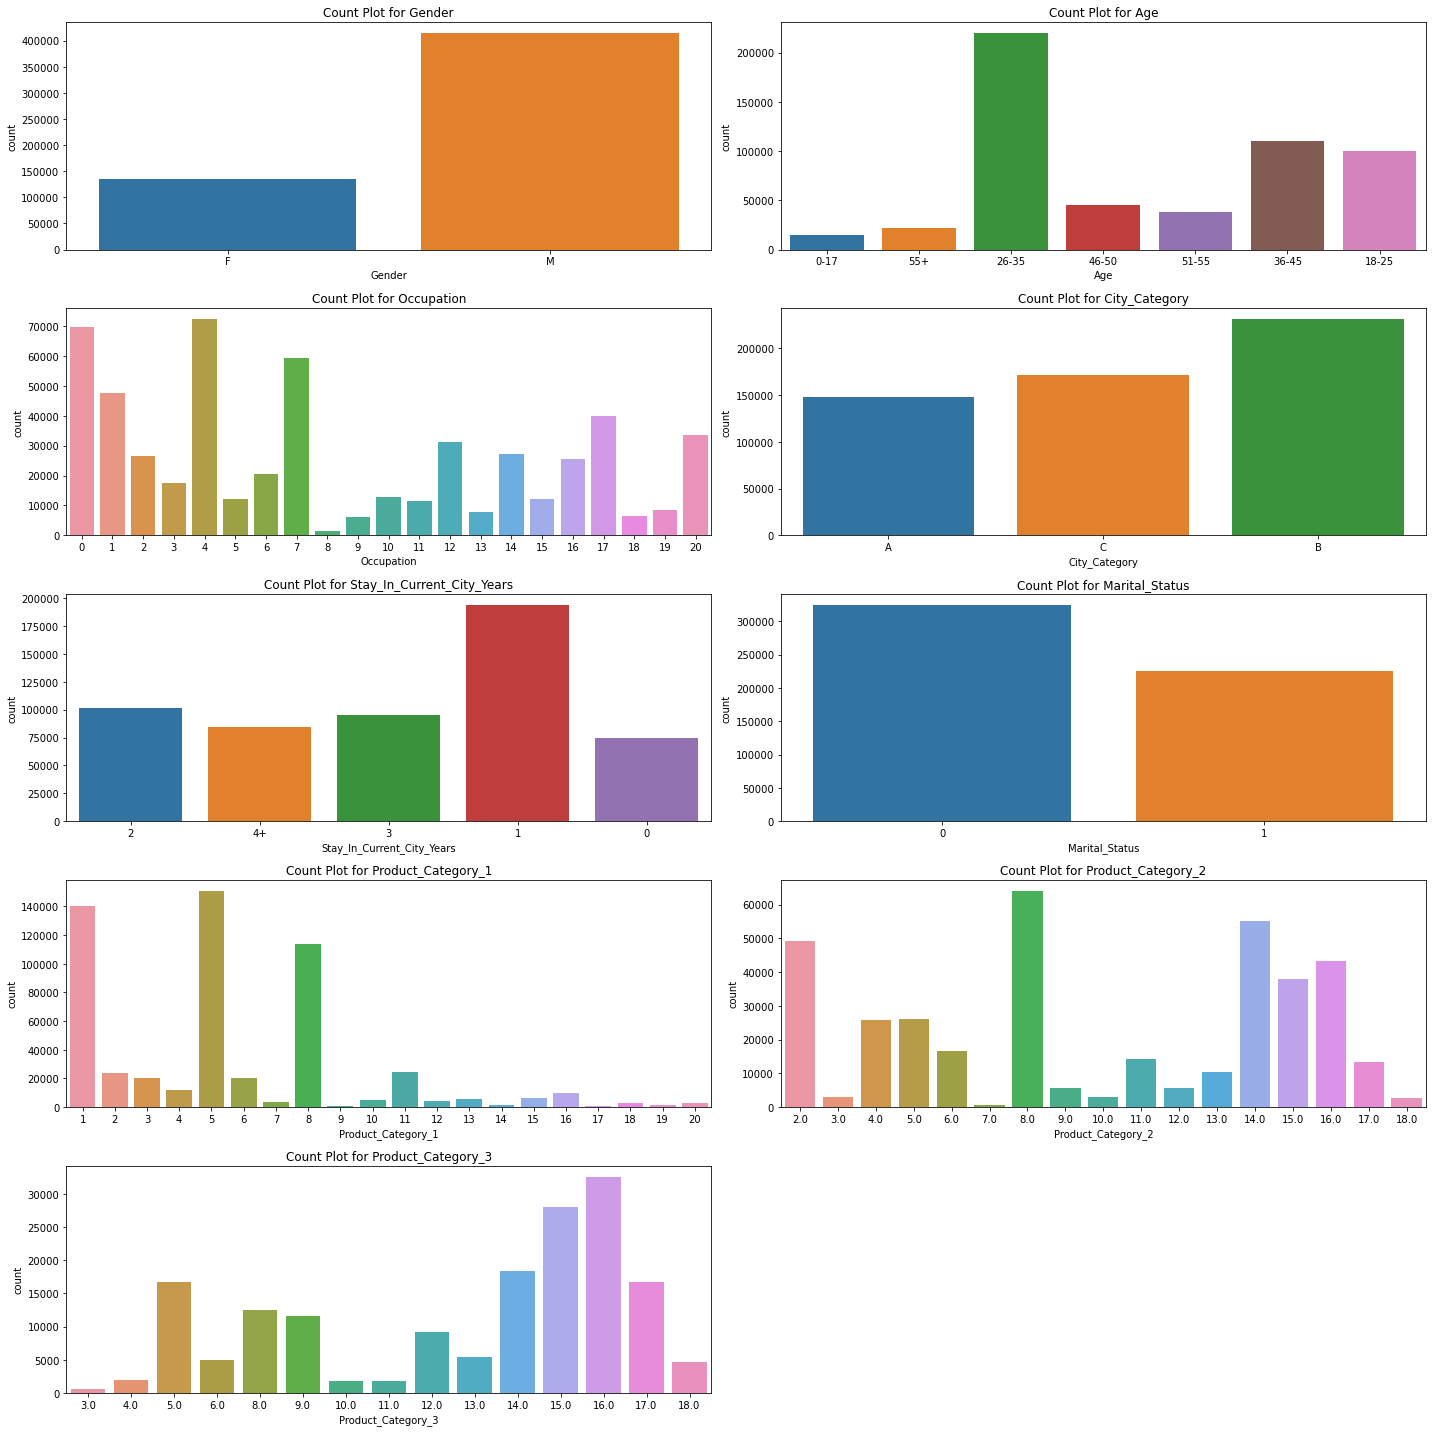

In [14]:

# Setting up a grid for subplots based on the number of selected columns
n_col=2
n_rows=((len(countplot_columns)+1)//n_col)
fig,axes=plt.subplots(ncols=n_col,nrows=n_rows,figsize=(20,20))
axes=axes.flatten()

# Created a countplot for each selected column and setting a title
for col_no,each_col in enumerate(countplot_columns):
  sns.countplot(data=df,x=each_col,ax=axes[col_no])
  axes[col_no].set_title(f'Count Plot for {each_col}')

# Deleting any unused subplots 
for plot_to_del in range(col_no+1,len(axes)):
  fig.delaxes(ax=axes[plot_to_del])

plt.tight_layout()
plt.show()


### Bi-Variate Analysis

In [15]:
# Creating a fucntion to dynamically create pivots based upon the function of numpy that I provide as aggregation function
def pivot_table_creater(data_for_pivot=df,columns_rqd=countplot_columns,aggregation_function=np.median):
  pd_dict={}
  for col_no,col_name in enumerate(columns_rqd):
    pd_dict[f'p_{col_no}']=pd.pivot_table(data=data_for_pivot,values='Purchase',index=col_name,aggfunc=aggregation_function)
  return pd_dict

In [16]:
#Creating pivot tables for mean, median & sum
# I will focus on median to understand relationship between purchase & other variable
# As median is not affected by outliers 
pd_median=pivot_table_creater(aggregation_function=np.median)
pd_mean=pivot_table_creater(aggregation_function=np.mean)
pd_sum=pivot_table_creater(aggregation_function=np.sum)

In [17]:
# Making a function for the Bivariate analysis
def bivariate_with_pivots(pivot_for_bivariate=pd_median):
  n_col=2
  n_rows=(len(countplot_columns)+1)//n_col
  fig,axes=plt.subplots(nrows=n_rows,ncols=n_col,figsize=(20,20))
  axes=axes.flatten()

  for axes_index,(pivot_keys,pivots) in enumerate(pivot_for_bivariate.items()):
    pivots.plot(kind='bar',ax=axes[axes_index])

  for plot_to_del in range (axes_index+1,len(axes)):
    fig.delaxes(ax=axes[plot_to_del])

  plt.tight_layout()
  plt.show()

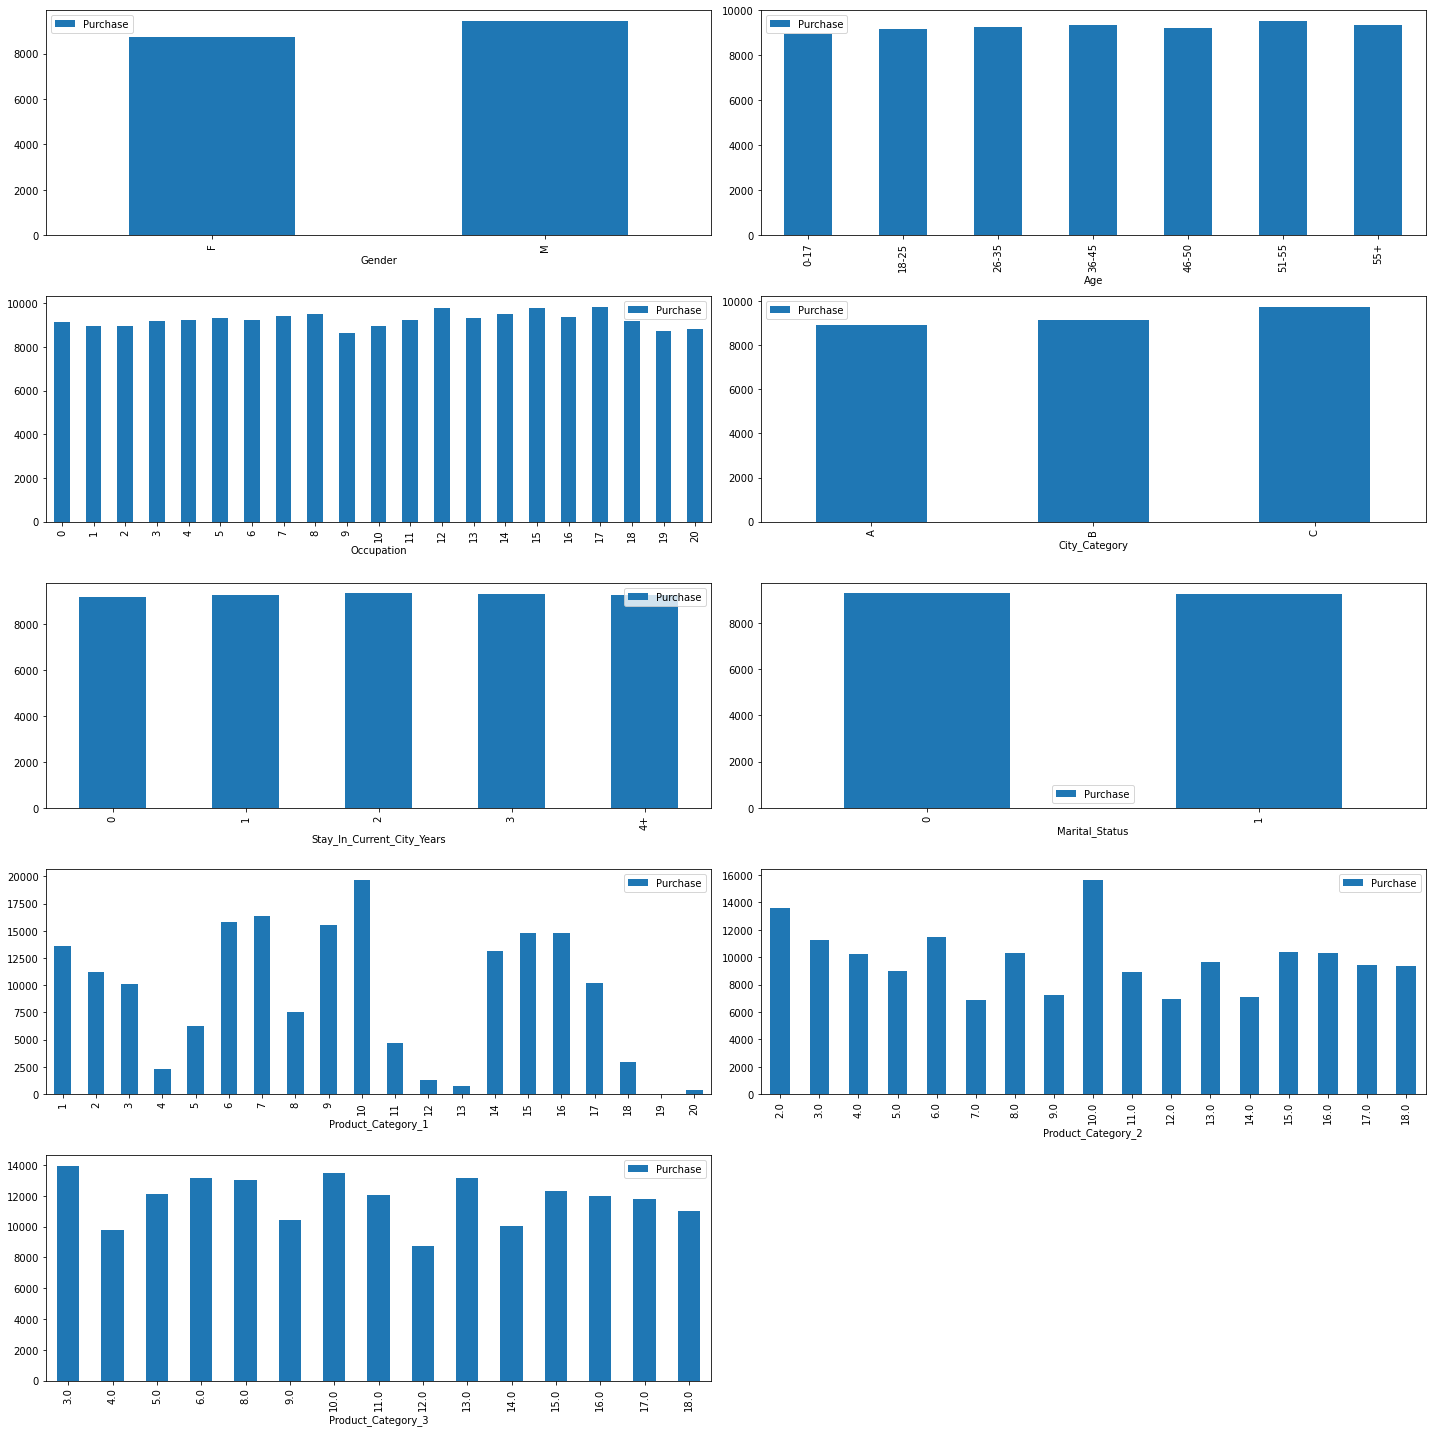

In [18]:
bivariate_with_pivots(pd_mean)

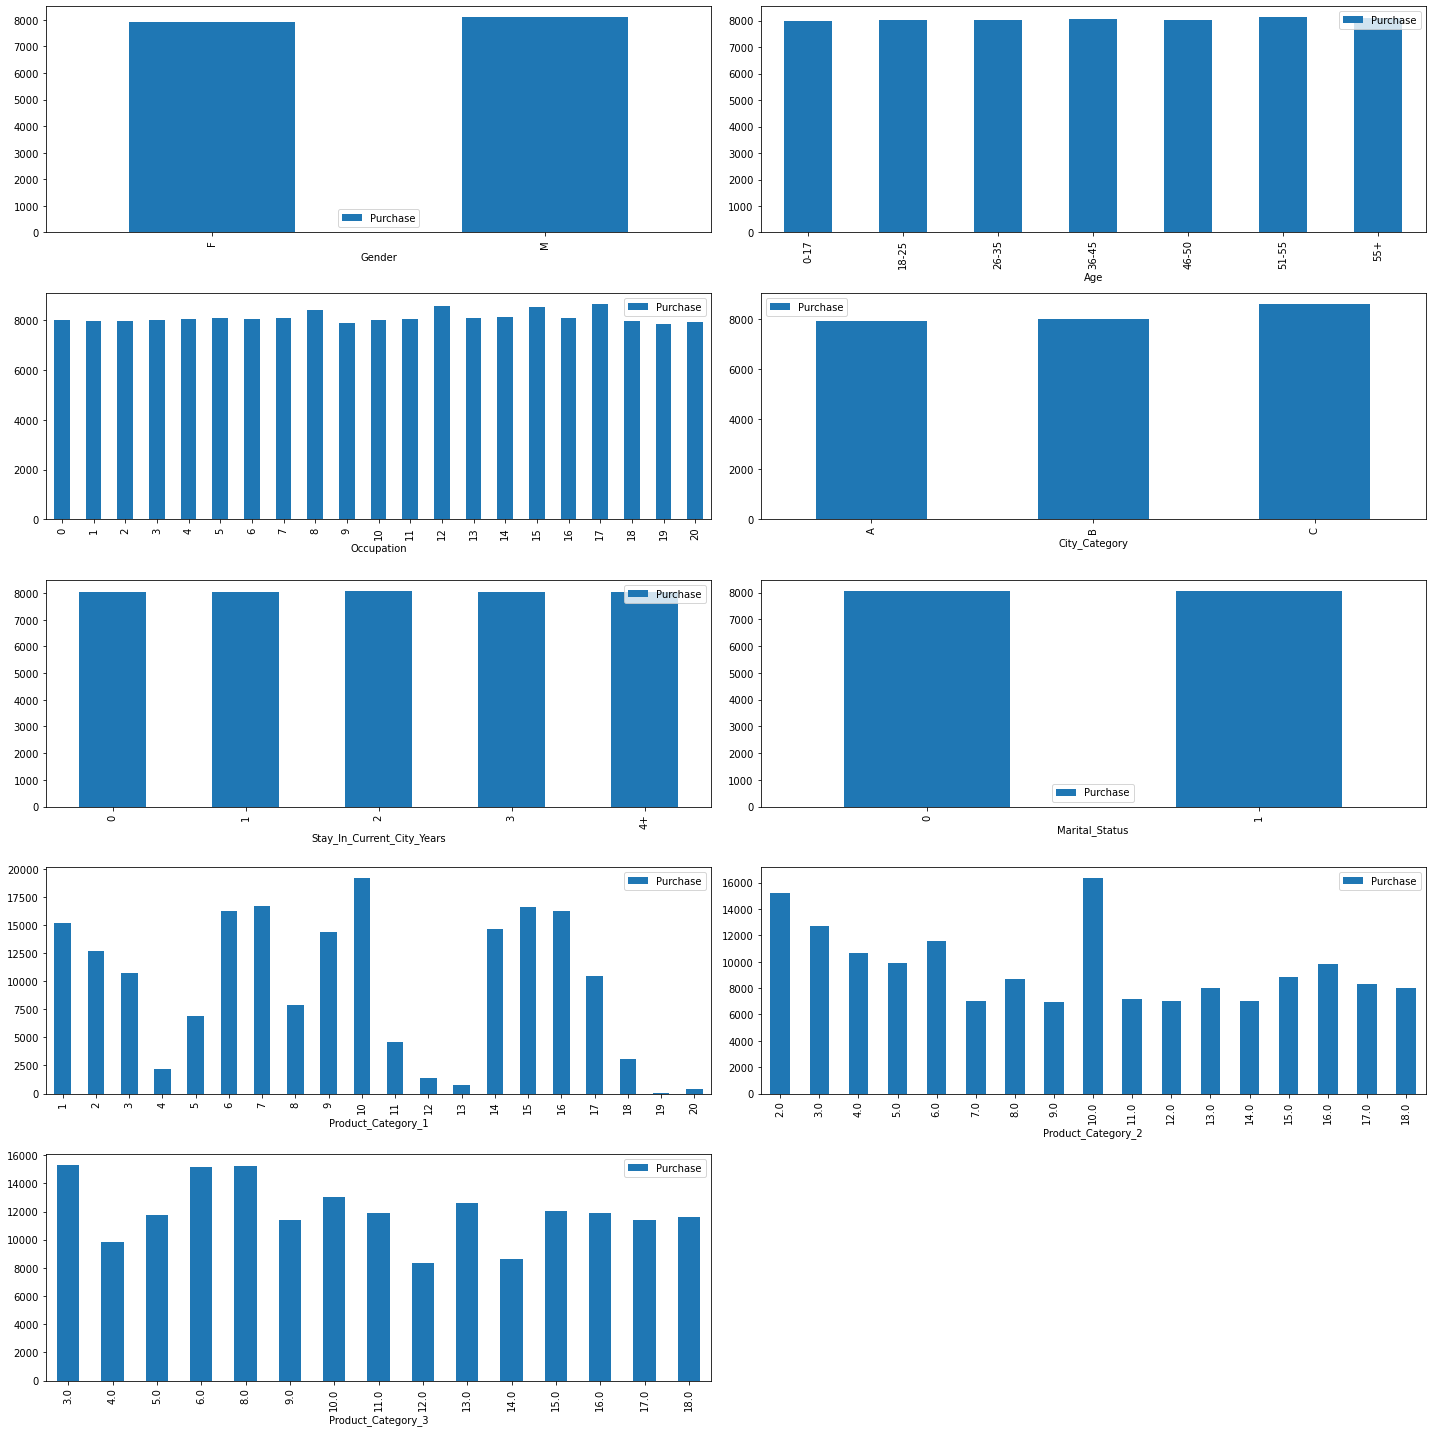

In [19]:
bivariate_with_pivots(pd_median)

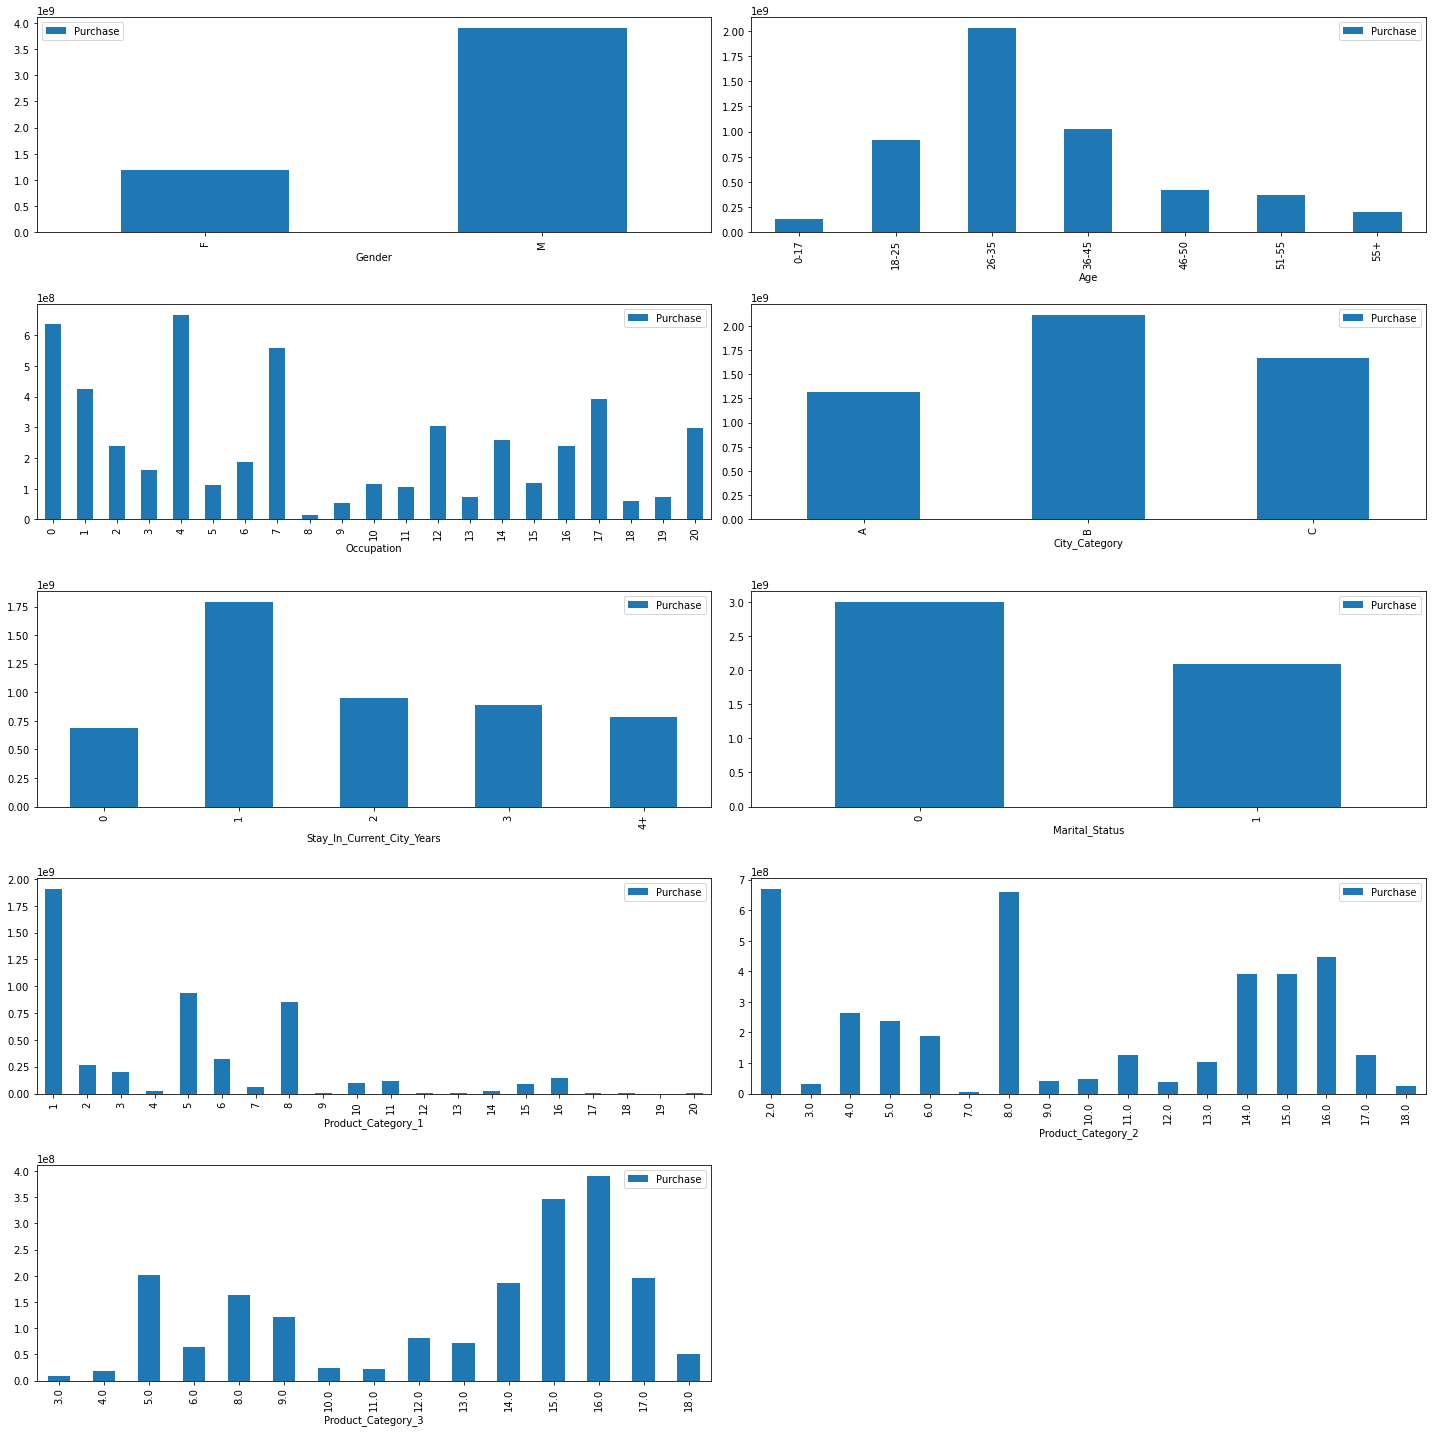

In [20]:
bivariate_with_pivots(pd_sum)

### Multivariate Analysis

#### Before going to the multivariate analysis, I decided to complete the dummy columns for categorical variables

In [21]:
# Checking the misssing value % --> The columns Product Category 2 & Product Category 3 has sigificant missing data
# In the next steps I plan to create ML algoriothm for misissing value imputation
# However for the first version I am dropping these columns
(df.isnull().sum()/df.shape[0])*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [22]:
# Identifying dynamically the columns which have more than 30% missing data
df_of_missinge_values=pd.DataFrame((df.isnull().sum()/df.shape[0])*100,columns=['Missing_Value'])
col_to_drop=list(df_of_missinge_values[df_of_missinge_values.Missing_Value>30].index)

In [23]:
# Dropping the columns which will not give efficient model --> User_ID, Product_ID
col_to_drop=col_to_drop+['Product_ID','User_ID']

In [24]:
#Dropping the columns
df.drop(col_to_drop,axis=1,inplace=True)

In [25]:
# Reverfying
(df.isnull().sum()/df.shape[0])*100

Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Purchase                      0.0
dtype: float64

In [26]:
# Reverfying
df.nunique()

Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Purchase                      18105
dtype: int64

In [27]:
# Checking datatype
df.dtypes

Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Purchase                       int64
dtype: object

In [28]:
# Making dummy columns
dummy_columns=[each_col for each_col in countplot_columns if each_col in df.columns]


In [29]:
# Need to convert the integer columns into categorical columns for applying the pd.get_dummies
int_to_obj_col=[each_col for each_col in df.select_dtypes(include=['int64']).columns if each_col in dummy_columns ]
df[int_to_obj_col]=df[int_to_obj_col].astype(object)

In [30]:
# Making the dummy columns
dummies=pd.get_dummies(df[dummy_columns],drop_first=True)
df=pd.concat([dummies,(df.drop(dummy_columns,axis=1))],axis=1)
df.head()

,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_1,Occupation_2,Occupation_3,...,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20,Purchase
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8370
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15200
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1422
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1057
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,7969


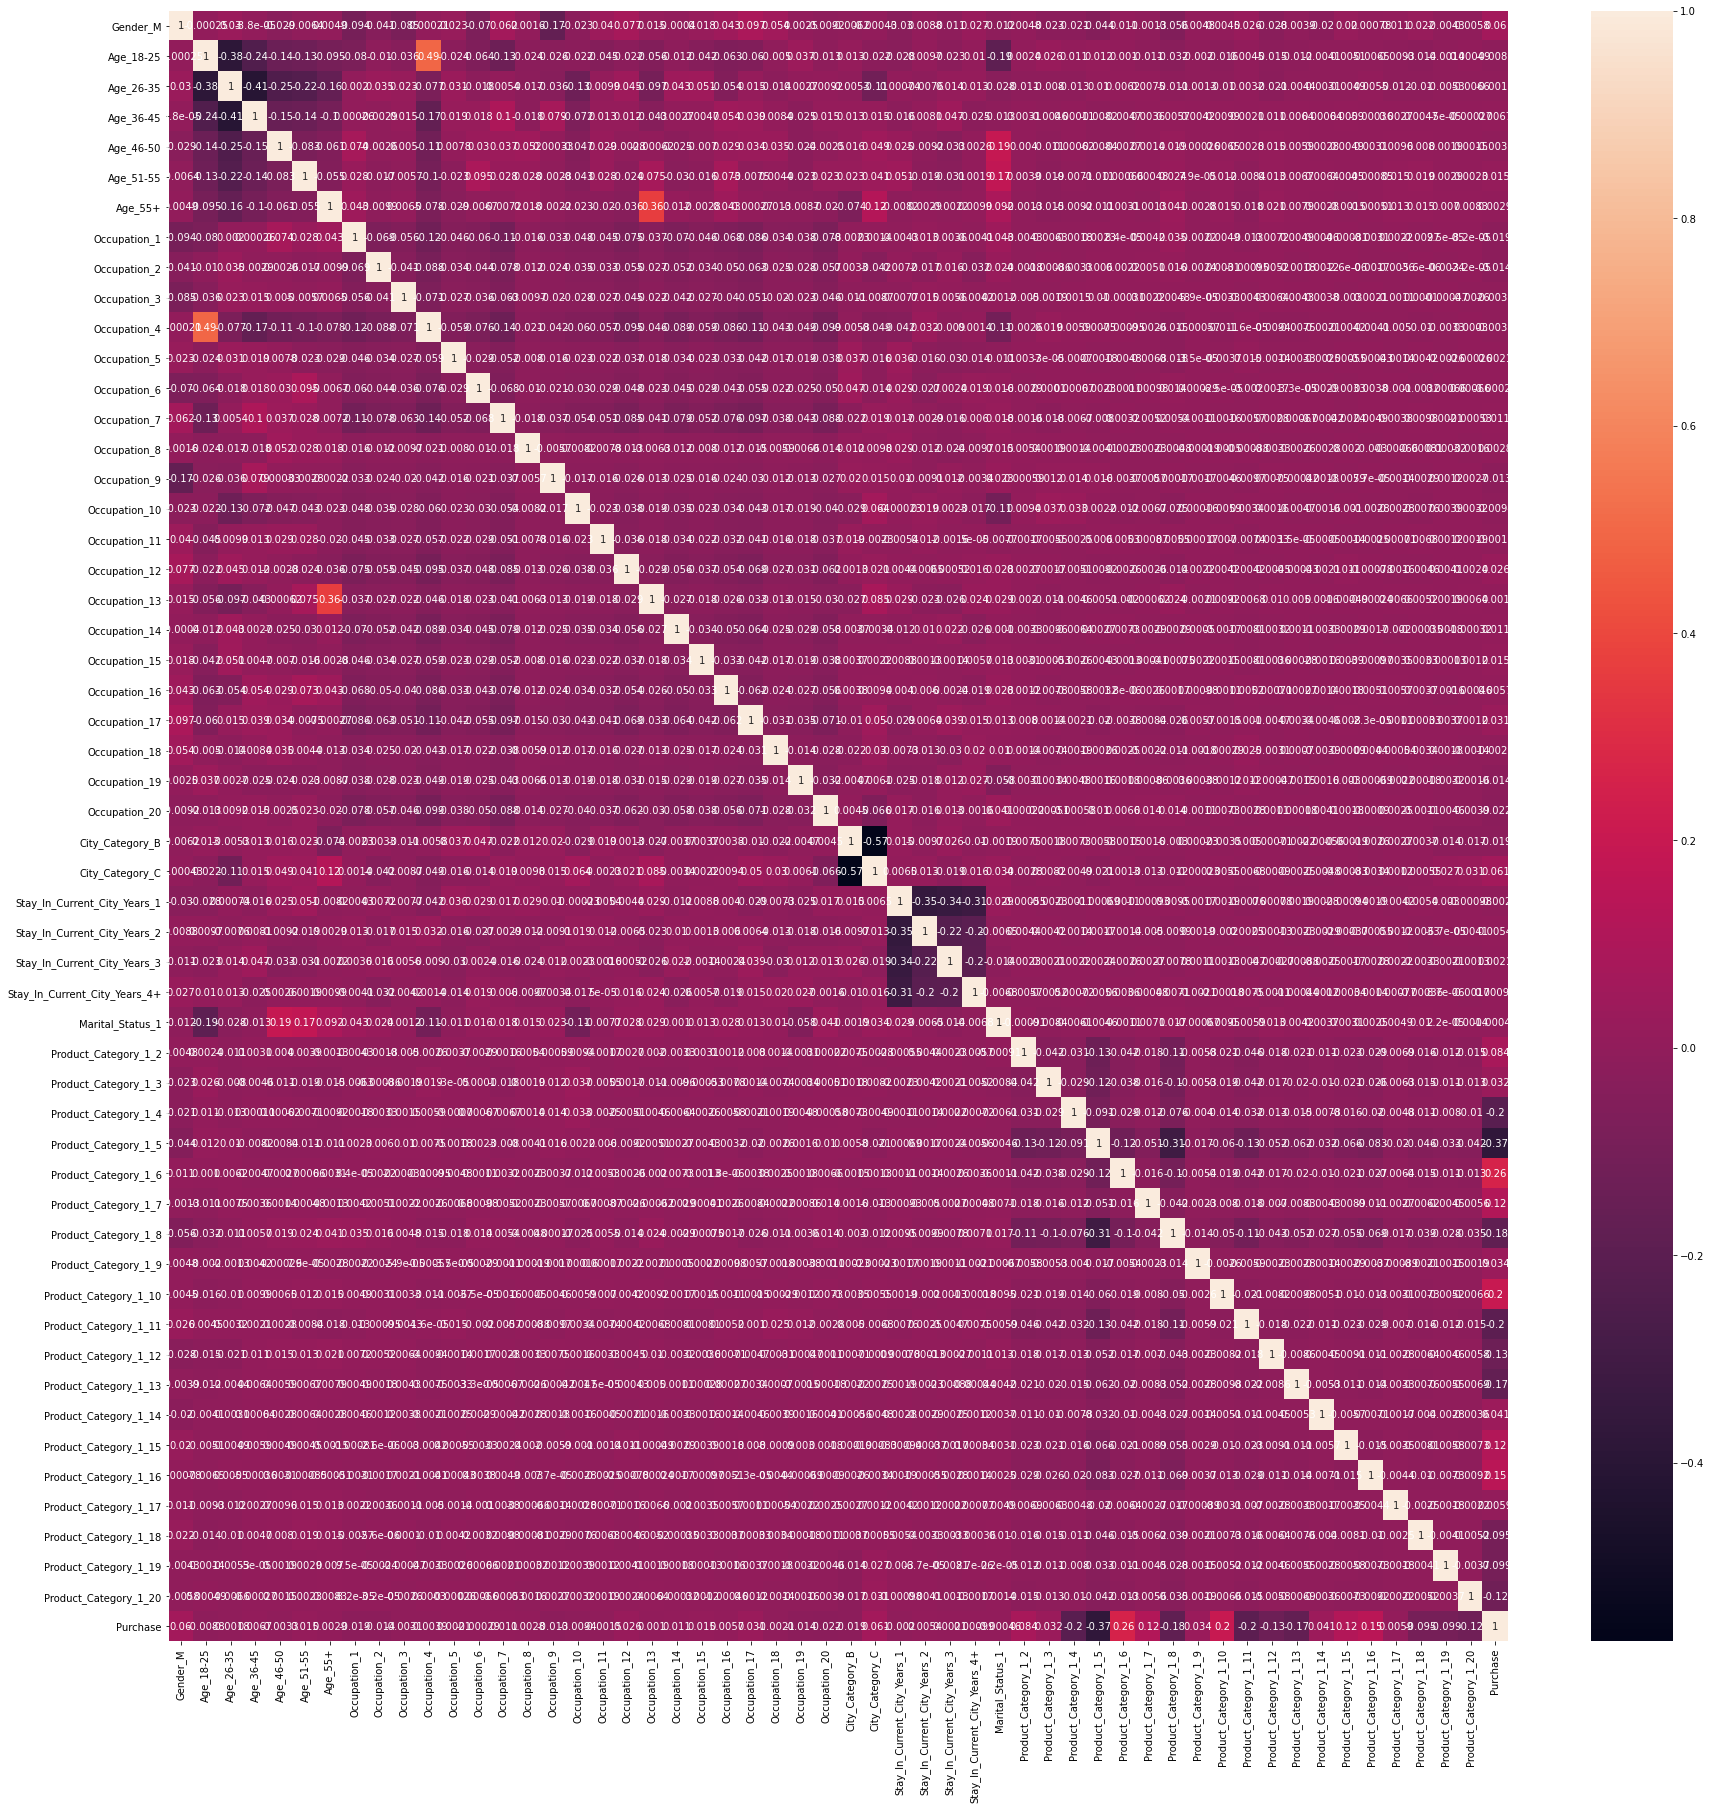

In [31]:
plt.figure(figsize=(30,30))

corr_mat=df.corr()
sns.heatmap(corr_mat,annot=True)

plt.show()